In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
data = np.load("../data/raw_data/raw_data.npy", allow_pickle=True)

In [3]:
df = pd.DataFrame(data)
print(df.shape)

(501138, 29)


In [4]:
ls = '''secondarylanguage
c_meds
grade
consent
billofrights
marital
resource_
inactive
coccupation
education
id
ethnicity
specialed
noticeofpriv
zipcode
religion
income
primarylanguage
fin
advancedirective
rreason
emplystatus
student
sex
race
siteid
hoccupation
dependents
certified_visits'''
colnames = ls.splitlines()

In [5]:
df.columns = colnames
df.head()

,secondarylanguage,c_meds,grade,consent,billofrights,marital,resource_,inactive,coccupation,education,...,advancedirective,rreason,emplystatus,student,sex,race,siteid,hoccupation,dependents,certified_visits
0,None,yes,None,None,None,F,None,None,None,None,...,None,None,None,None,M,None,ArapahoeHouse,None,1,-139
1,None,yes,None,None,None,Married,None,Active,Administrator,Engineering Degree,...,None,None,None,No,M,None,ArapahoeHouse,Administrator,0,-1033
2,None,yes,None,None,None,Divorced,None,Active,None,2.5 years of college,...,None,Alc dep,None,No,F,None,ArapahoeHouse,None,0,-238
3,None,yes,None,None,None,Single,None,None,None,None,...,None,None,None,None,M,None,ArapahoeHouse,None,0,-17
4,None,None,None,None,None,Single,None,None,None,None,...,None,None,None,None,M,None,ArapahoeHouse,None,1,-1


In [6]:
data_backup = df.copy()

### Marital 

In [7]:
df.marital.value_counts()

Single                                                150945
Married                                                72480
Never married                                          35904
Divorced                                               29273
Never Married                                          25383
Marital Status unknown                                 16619
N                                                      15689
Separated                                              11311
Widowed                                                 7948
Unknown                                                 5443
U                                                       2594
Marital Status                                          2350
C                                                       1071
S                                                        782
single                                                   764
Cohabitating                                             756
Divorced/Annulled       

In [8]:
# df.marital = map(lambda x: x.title(), df.marital)
df.marital = df.marital.str.lower()
df.marital = df.marital.fillna('Unknown').astype(str)
# df.marital.replace(['S', 'Si', 'SI', 'single','Singl'], 'Single', inplace=True)
# df.marital.replace('Parent is singl', 'Single', inplace=True, regex=True)
df.marital.replace('\b[Ss][Ii]', 'Single', inplace=True, regex=True)
df.marital.replace('Marital Status unknown', 'Unknown', inplace=True)
df.marital.replace('Marital Status', 'Unknown', inplace=True)
df.marital.replace('Never married', 'Never Married', inplace=True)
df.marital.replace('Divorced/Annulled', 'Divorced', inplace=True)
df.marital.replace('^[A-Za-z]$', 'Unknown', inplace=True, regex=True)

In [9]:
marital_cleaned = df.marital.value_counts()[df.marital.value_counts() >= 500]

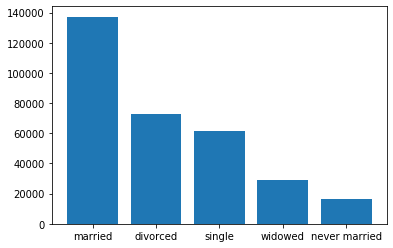

In [10]:
plt.bar(df.marital.unique()[1:6], df.marital.value_counts()[1:6])
plt.savefig('../results/plots/marital_status_top5.png', bbox_inches='tight')

### Income

In [11]:
np.set_printoptions(suppress=True)

In [12]:
# Should try to work with np arrays if dataset is too big (~>50k)
len(data)

501138

In [13]:
income_col = data[:,colnames.index('income')]
income_col = income_col.astype(str)
# income_col = [d for d in income_col if re.search('\d+', d)]

In [14]:
# Clean the strings
regex_num = re.compile('^\d+$')  #pattern: one or more digits only
vmatch = np.vectorize(lambda x:bool(regex_num.match(x))) # run throughout the column
sel = vmatch(income_col) 
income_ints = income_col[sel].astype(int) # convert to int

In [15]:
income_filtered = income_ints[(income_ints >= 1000) & (income_ints <100000)]

In [16]:
# from scipy import stats
# stats.describe(income_filtered)

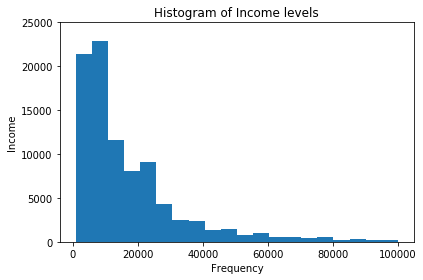

In [27]:
plt.hist(income_filtered, bins=20)
plt.title("Histogram of Income levels")
plt.ylim([0,25000])

# num_bins = 20
# fig, ax = plt.subplots()
# n, bins, patches = ax.hist(income_filtered, num_bins, density=1)

plt.xlabel('Frequency')
plt.ylabel('Income')
plt.tight_layout()
# plt.savefig('../results/plots/income_hist.png', bbox_inches='tight') # save image

### Gender

If have time